In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV, LogisticRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier, StackingClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,recall_score,precision_score,f1_score,log_loss, make_scorer

In [2]:
df = pd.read_csv('data/cleaned_review_data.csv', index_col = 0)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25690 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   review_id               25690 non-null  object 
 1   user_id                 25690 non-null  object 
 2   business_id             25690 non-null  object 
 3   stars                   25690 non-null  float64
 4   useful                  25690 non-null  int64  
 5   funny                   25690 non-null  int64  
 6   cool                    25690 non-null  int64  
 7   text                    25690 non-null  object 
 8   date                    25690 non-null  object 
 9   year                    25690 non-null  int64  
 10  month                   25690 non-null  int64  
 11  day                     25690 non-null  int64  
 12  hour                    25690 non-null  int64  
 13  min                     25690 non-null  int64  
 14  sec                     25690 non-null

In [4]:
df['stars'] = df['stars'].astype('int64')

<AxesSubplot:>

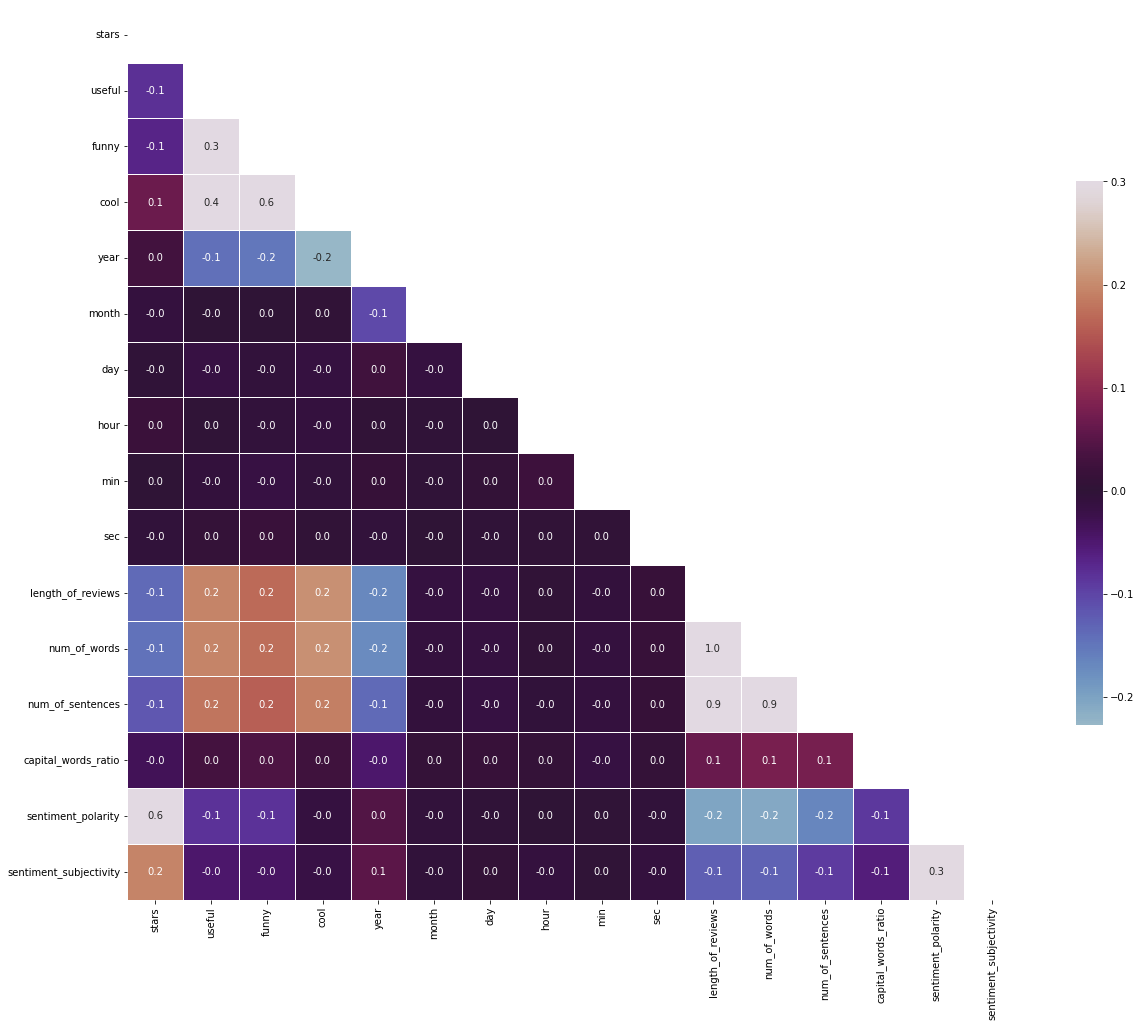

In [5]:
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot = True, fmt=".1f", mask=mask, cmap='twilight', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [8]:
# CLASSIFICATION
data_classes = df[(df['stars']==1) | (df['stars']==3) | (df['stars']==5)]
data_classes.head()
print(data_classes.shape)

(16514, 22)


In [9]:
X = data_classes.drop(columns=['stars', 'review_id', 'user_id', 'business_id', 'text', 'date', 'month', 'day', 'hour', 'min', 'cleaned_text'])
y = data_classes['stars']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

In [10]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

### Model Selection

In [12]:
models = [ KNeighborsClassifier(), DecisionTreeClassifier(), RandomForestClassifier(), GradientBoostingClassifier(), xgb.XGBClassifier()]

for ml in models:
    
    ### train
    ml.fit(X_train, y_train)
    
    ### predict
    y_pred = ml.predict(X_test)
 
    print(ml, 'test accuracy:', ml.score(X_test, y_test))
    # print(classification_report(y_test,y_pred))
    print(confusion_matrix(y_test, y_pred))

/Users/yonniechan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/yonniechan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will n

KNeighborsClassifier() test accuracy: 0.6872540115046927
[[ 331   98  147]
 [  95  118  386]
 [ 103  204 1821]]
DecisionTreeClassifier() test accuracy: 0.6430517711171662
[[ 316  119  141]
 [  88  170  341]
 [ 134  356 1638]]
RandomForestClassifier() test accuracy: 0.7471995155918861
[[ 390   38  148]
 [  84   98  417]
 [  63   85 1980]]
GradientBoostingClassifier() test accuracy: 0.7517408416590978
[[ 395   45  136]
 [  84  100  415]
 [  63   77 1988]]
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_cons

In [21]:
# params = {'learning_rate': [0.1, 0.05, 0.001],
#           'n_estimators': range(50, 150, 50), 
#         #   'subsample': [0.8, 1], 
#           # 'criterion':'friedman_mse', 
#           # 'min_samples_split': [600, 800, 1000, 1200], 
#           'min_samples_leaf': [50, 100, 150],
#           # 'min_weight_fraction_leaf': 0.0, 
#           'max_depth': range(3, 11, 2), # usually 5-8
#           # 'min_impurity_decrease': 0.0, 
#           # 'max_features':None, 
#           # 'alpha':0.9, 
#           # 'verbose':0, 
#           # 'max_leaf_nodes':None, 
#           # 'warm_start':False, 
#           # 'validation_fraction':0.1, 
#           # 'n_iter_no_change':None, 
#           # 'tol':0.0001,
#           # 'ccp_alpha':0.0
#           }

# model = GradientBoostingClassifier()

# grid_search = GridSearchCV(
#     estimator = model,
#     param_grid = params,
#     scoring = "recall"
# )
# grid_search.fit(X_train, y_train)

# gb_best_params = grid_search.best_params_
# print("best_parameters: ", gb_best_params)
# # print("best_model_score: ", grid_search.score(X_test, y_test))

# print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
# print('Precision Score : ' + str(precision_score(y_test,y_pred)))
# print('Recall Score : ' + str(recall_score(y_test,y_pred)))
# print('F1 Score : ' + str(f1_score(y_test,y_pred)))

# confusion_matrix(y_test,y_pred)

In [ ]:
# params = {
#           'objective':['binary:logistic'],
#           'learning_rate': [0.001, 0.05, 0.1], #so called `eta` value
#           'max_depth': range(3, 9, 2),
#             #   'min_child_weight': [4],
#             #   'silent': [1],
#             #   'subsample': [0.7],
#             #   'colsample_bytree': [0.7],
#           'n_estimators': range(50, 150, 50)
#           }

# model = xgb.XGBClassifier()

# grid_search = GridSearchCV(
#     estimator = model,
#     param_grid = params,
#     scoring = "recall"
# )
# grid_search.fit(X_train, y_train)


# xgb_best_params = grid_search.best_params_
# print(grid_search.best_score_, xgb_best_params)
# print("best_parameters: ", xgb_best_params)
# # print("best_model_score: ", grid_search.score(X_test, y_test))

# print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
# print('Precision Score : ' + str(precision_score(y_test,y_pred)))
# print('Recall Score : ' + str(recall_score(y_test,y_pred)))
# print('F1 Score : ' + str(f1_score(y_test,y_pred)))

# confusion_matrix(y_test,y_pred)

### Final Model on Validation data

In [ ]:
# estimators = [
#     ('rf', RandomForestClassifier()),
#     ('gb', GradientBoostingClassifier(**gb_best_params)), 
#     ('xgb',xgb.XGBClassifier(**xgb_best_params))
# ] 

# clf = StackingClassifier(
#     estimators = estimators,
#     final_estimator = GradientBoostingClassifier(**gb_best_params), 
#     cv = 5
# )

# clf.fit(X_train, y_train)
# y_pred = clf.predict(X_test)

# print(ml, 'Stacking test accuracy:', clf.score(X_test, y_test))
# # print(ml, 'train accuracy:', ml.score(X_train, y_train))

# print(classification_report(y_test,y_pred))
# # metrics.plot_roc_curve(ml, X_test, y_test)

# # confusion_matrix(y_test, y_pred)
# # pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True)

In [23]:
clf = GradientBoostingClassifier()

clf.fit(X_train, y_train)

X = np.concatenate((X_train, X_test))
y = np.concatenate((y_train, y_test))

y_pred = clf.predict(X)

print('Test accuracy:', clf.score(X, y))

print(confusion_matrix(y, y_pred))

print(classification_report(y, y_pred))

Test accuracy: 0.7624439869201889
[[2069  193  580]
 [ 453  666 2008]
 [ 321  368 9856]]
              precision    recall  f1-score   support

           0       0.73      0.73      0.73      2842
           1       0.54      0.21      0.31      3127
           2       0.79      0.93      0.86     10545

    accuracy                           0.76     16514
   macro avg       0.69      0.63      0.63     16514
weighted avg       0.73      0.76      0.73     16514

